In [1]:
from statsbombpy import sb
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
import numpy as np
import pandas as pd
import networkx as nx
import math

In [2]:
sb.competitions()

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2021-04-19T17:36:05.724116,2021-04-19T17:36:05.724116
1,16,1,Europe,Champions League,male,2017/2018,2021-01-23T21:55:30.425330,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [3]:
sb.matches(competition_id=11, season_id=42)

credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,303421,2020-07-19,17:00:00.000,Spain - La Liga,2019/2020,Deportivo Alavés,Barcelona,0,5,available,unscheduled,2020-07-29T05:00,None,38,Regular Season,Estadio de Mendizorroza,J. Martínez,1.1.0,2,2
1,303493,2020-06-23,22:00:00.000,Spain - La Liga,2019/2020,Barcelona,Athletic Bilbao,1,0,available,unscheduled,2020-07-29T05:00,None,31,Regular Season,Camp Nou,Jesús Gil,1.1.0,2,2
2,303516,2020-06-27,17:00:00.000,Spain - La Liga,2019/2020,Celta Vigo,Barcelona,2,2,available,unscheduled,2020-07-29T05:00,None,32,Regular Season,Abanca-Balaídos,G. Cuadra,1.1.0,2,2
3,303680,2020-07-11,19:30:00.000,Spain - La Liga,2019/2020,Real Valladolid,Barcelona,0,1,available,unscheduled,2020-12-18T12:10:38.985394,None,36,Regular Season,Estadio Municipal José Zorrilla,Antonio Mateu,1.1.0,2,2
4,303532,2020-06-16,22:00:00.000,Spain - La Liga,2019/2020,Barcelona,Leganés,2,0,available,unscheduled,2020-07-29T05:00,None,29,Regular Season,Camp Nou,J. Martínez,1.1.0,2,2
5,303400,2020-01-25,16:00:00.000,Spain - La Liga,2019/2020,Valencia,Barcelona,2,0,available,unscheduled,2020-07-29T05:00,None,21,Regular Season,Estadio de Mestalla,Jesús Gil,1.1.0,2,2
6,303634,2020-07-16,21:00:00.000,Spain - La Liga,2019/2020,Barcelona,Osasuna,1,2,available,unscheduled,2020-09-18T13:16:12.825671,None,37,Regular Season,Camp Nou,J. Sánchez,1.1.0,2,2
7,303479,2020-03-07,18:30:00.000,Spain - La Liga,2019/2020,Barcelona,Real Sociedad,1,0,available,unscheduled,2020-07-29T05:00,None,27,Regular Season,Camp Nou,J. Martínez,1.1.0,2,2
8,303615,2020-07-08,22:00:00.000,Spain - La Liga,2019/2020,Barcelona,Espanyol,1,0,available,unscheduled,2020-09-11T23:12:41.238499,None,35,Regular Season,Camp Nou,J. Munuera,1.1.0,2,2
9,303696,2020-06-30,22:00:00.000,Spain - La Liga,2019/2020,Barcelona,Atlético Madrid,2,2,available,unscheduled,2020-07-29T05:00,None,33,Regular Season,Camp Nou,A. Hernández,1.1.0,2,2


In [4]:
events=sb.events(match_id=303470)
events.head()

credentials were not supplied. open data access only


,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4141, 'lineup': [{'player': {'id...",Real Madrid,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 442, 'lineup': [{'player': {'id'...",Barcelona,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Real Madrid,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:00.000,Half Start,NaN


In [5]:
events.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection',
       'block_save_block', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_no_touch',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_success_in_play', 'goalkeeper_technique', 'goalkeeper_type',
       'id', 'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'p

In [6]:
events_1=events[['team', 'type', 'minute', 'location', 'pass_end_location', 'pass_outcome', 'player']]
events_1

,team,type,minute,location,pass_end_location,pass_outcome,player
0,Real Madrid,Starting XI,0,NaN,NaN,NaN,NaN
1,Barcelona,Starting XI,0,NaN,NaN,NaN,NaN
2,Barcelona,Half Start,0,NaN,NaN,NaN,NaN
3,Real Madrid,Half Start,0,NaN,NaN,NaN,NaN
4,Barcelona,Half Start,45,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4222,Barcelona,Substitution,79,NaN,NaN,NaN,Arthur Henrique Ramos de Oliveira Melo
4223,Barcelona,Substitution,80,NaN,NaN,NaN,Antoine Griezmann
4224,Real Madrid,Substitution,85,NaN,NaN,NaN,Federico Santiago Valverde Dipetta
4225,Real Madrid,Substitution,90,NaN,NaN,NaN,Karim Benzema


In [7]:
events_1.player.unique()

array([nan, 'Karim Benzema', 'Francisco Román Alarcón Suárez',
       'Carlos Henrique Casimiro', 'Toni Kroos', 'Sergio Ramos García',
       'Marcelo Vieira da Silva Júnior', 'Raphaël Varane',
       'Daniel Carvajal Ramos', 'Vinícius José Paixão de Oliveira Júnior',
       'Lionel Andrés Messi Cuccittini', 'Frenkie de Jong',
       'Arthur Henrique Ramos de Oliveira Melo', 'Gerard Piqué Bernabéu',
       'Arturo Erasmo Vidal Pardo', 'Sergio Busquets i Burgos',
       'Nélson Cabral Semedo', 'Antoine Griezmann', 'Samuel Yves Umtiti',
       'Jordi Alba Ramos', 'Federico Santiago Valverde Dipetta',
       'Marc-André ter Stegen', 'Thibaut Courtois',
       'Martin Braithwaite Christensen', 'Luka Modrić', 'Ivan Rakitić',
       'Lucas Vázquez Iglesias', 'Anssumane Fati', 'Mariano Díaz Mejía'],
      dtype=object)

In [8]:
events_1=events_1[events_1['player']=='Lionel Andrés Messi Cuccittini'].reset_index()

In [9]:
events_1

,index,team,type,minute,location,pass_end_location,pass_outcome,player
0,34,Barcelona,Pass,1,"[22.9, 56.4]","[44.7, 19.5]",NaN,Lionel Andrés Messi Cuccittini
1,37,Barcelona,Pass,1,"[71.0, 37.1]","[72.4, 20.1]",NaN,Lionel Andrés Messi Cuccittini
2,50,Barcelona,Pass,2,"[101.9, 58.4]","[96.7, 51.5]",NaN,Lionel Andrés Messi Cuccittini
3,53,Barcelona,Pass,2,"[99.0, 41.0]","[97.3, 36.0]",NaN,Lionel Andrés Messi Cuccittini
4,63,Barcelona,Pass,2,"[83.9, 56.0]","[77.8, 58.7]",NaN,Lionel Andrés Messi Cuccittini
...,...,...,...,...,...,...,...,...
254,4166,Barcelona,Dispossessed,46,"[78.2, 28.9]",NaN,NaN,Lionel Andrés Messi Cuccittini
255,4175,Barcelona,Dispossessed,73,"[95.2, 37.9]",NaN,NaN,Lionel Andrés Messi Cuccittini
256,4176,Barcelona,Dispossessed,74,"[103.8, 35.9]",NaN,NaN,Lionel Andrés Messi Cuccittini
257,4196,Barcelona,Foul Won,48,"[90.6, 12.6]",NaN,NaN,Lionel Andrés Messi Cuccittini


In [10]:
events_1.type.unique()

array(['Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Block',
       'Ball Recovery', 'Interception', 'Dribbled Past', 'Dribble',
       'Miscontrol', 'Foul Committed', 'Shot', 'Dispossessed', 'Foul Won'],
      dtype=object)

In [11]:
events_1 = events_1[events_1['type'].isin(['Pass'])]
events_1

,index,team,type,minute,location,pass_end_location,pass_outcome,player
0,34,Barcelona,Pass,1,"[22.9, 56.4]","[44.7, 19.5]",NaN,Lionel Andrés Messi Cuccittini
1,37,Barcelona,Pass,1,"[71.0, 37.1]","[72.4, 20.1]",NaN,Lionel Andrés Messi Cuccittini
2,50,Barcelona,Pass,2,"[101.9, 58.4]","[96.7, 51.5]",NaN,Lionel Andrés Messi Cuccittini
3,53,Barcelona,Pass,2,"[99.0, 41.0]","[97.3, 36.0]",NaN,Lionel Andrés Messi Cuccittini
4,63,Barcelona,Pass,2,"[83.9, 56.0]","[77.8, 58.7]",NaN,Lionel Andrés Messi Cuccittini
...,...,...,...,...,...,...,...,...
65,1177,Barcelona,Pass,84,"[84.6, 45.4]","[80.9, 42.2]",Incomplete,Lionel Andrés Messi Cuccittini
66,1209,Barcelona,Pass,89,"[54.1, 43.8]","[64.4, 41.2]",NaN,Lionel Andrés Messi Cuccittini
67,1211,Barcelona,Pass,89,"[62.9, 35.9]","[64.5, 35.1]",Incomplete,Lionel Andrés Messi Cuccittini
68,1215,Barcelona,Pass,90,"[90.8, 17.6]","[109.3, 41.2]",Incomplete,Lionel Andrés Messi Cuccittini


In [12]:
events_1.pass_outcome.unique()

array([nan, 'Incomplete', 'Out', 'Unknown'], dtype=object)

In [13]:
Loc = events_1['location']
Loc = pd.DataFrame(Loc.to_list(), columns=['x', 'y'])

C:\Users\indra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


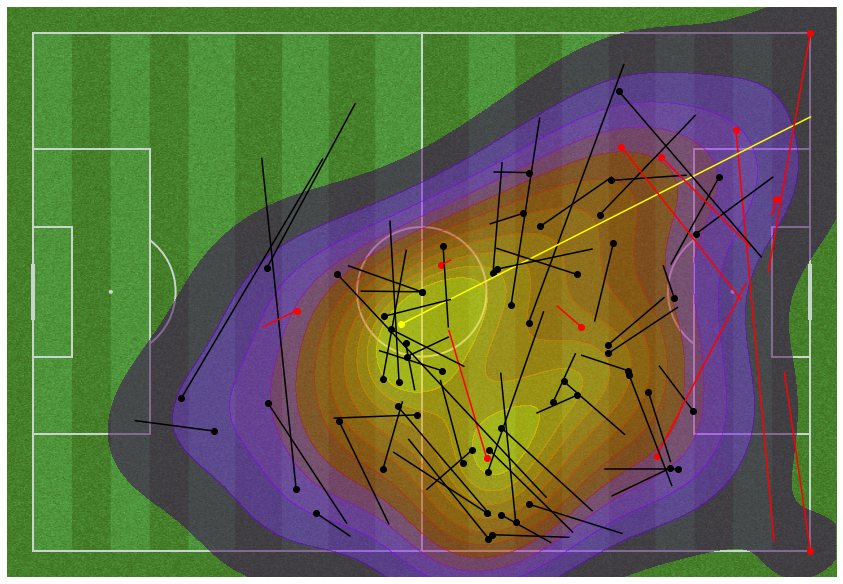

In [14]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='grass', line_color='#c7d5cc', figsize=(13.5, 8),
              constrained_layout=True, stripe=True, tight_layout=False)
fig, ax = pitch.draw()
#plt.gca().invert_yaxis()

kde = sns.kdeplot(
    Loc['x'],
    Loc['y'],
    shade=True,
    thresh=0.05,
    alpha = 0.5,
    n_levels=12,
    cmap = 'gnuplot'
)

for i in range(len(events_1)):
    if events_1.pass_outcome[i]=='Incomplete' or events_1.pass_outcome[i]=='Unknown':
        plt.plot((events_1.location[i][0], events_1.pass_end_location[i][0]), (events_1.location[i][1], events_1.pass_end_location[i][1]), color='red')
        plt.scatter(events_1.location[i][0], events_1.location[i][1], color='red')
    elif events_1.pass_outcome[i]=='Pass Offside':
        plt.plot((events_1.location[i][0], events_1.pass_end_location[i][0]), (events_1.location[i][1], events_1.pass_end_location[i][1]), color='blue')
        plt.scatter(events_1.location[i][0], events_1.location[i][1], color='blue')
    elif events_1.pass_outcome[i]=='Out':
        plt.plot((events_1.location[i][0], events_1.pass_end_location[i][0]), (events_1.location[i][1], events_1.pass_end_location[i][1]), color='yellow')
        plt.scatter(events_1.location[i][0], events_1.location[i][1], color='yellow')
    else:
        plt.plot((events_1.location[i][0], events_1.pass_end_location[i][0]), (events_1.location[i][1], events_1.pass_end_location[i][1]), color='black')
        plt.scatter(events_1.location[i][0], events_1.location[i][1], color='black')

In [15]:
data=[]
for i in range(len(events_1)):
    if type(events_1.pass_outcome[i])==float:
        data.append('successfull')
    else:
        data.append('unsuccessfull')

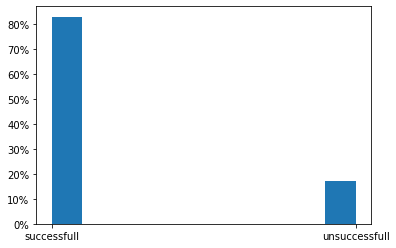

In [16]:
from matplotlib.ticker import PercentFormatter

plt.hist(data, weights=np.ones(len(data)) / len(data))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

In [17]:
events_2=events[['team', 'type', 'minute', 'location', 'shot_end_location', 'shot_outcome', 'player']]
events_2

,team,type,minute,location,shot_end_location,shot_outcome,player
0,Real Madrid,Starting XI,0,NaN,NaN,NaN,NaN
1,Barcelona,Starting XI,0,NaN,NaN,NaN,NaN
2,Barcelona,Half Start,0,NaN,NaN,NaN,NaN
3,Real Madrid,Half Start,0,NaN,NaN,NaN,NaN
4,Barcelona,Half Start,45,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4222,Barcelona,Substitution,79,NaN,NaN,NaN,Arthur Henrique Ramos de Oliveira Melo
4223,Barcelona,Substitution,80,NaN,NaN,NaN,Antoine Griezmann
4224,Real Madrid,Substitution,85,NaN,NaN,NaN,Federico Santiago Valverde Dipetta
4225,Real Madrid,Substitution,90,NaN,NaN,NaN,Karim Benzema


In [18]:
events_2.player.unique()

array([nan, 'Karim Benzema', 'Francisco Román Alarcón Suárez',
       'Carlos Henrique Casimiro', 'Toni Kroos', 'Sergio Ramos García',
       'Marcelo Vieira da Silva Júnior', 'Raphaël Varane',
       'Daniel Carvajal Ramos', 'Vinícius José Paixão de Oliveira Júnior',
       'Lionel Andrés Messi Cuccittini', 'Frenkie de Jong',
       'Arthur Henrique Ramos de Oliveira Melo', 'Gerard Piqué Bernabéu',
       'Arturo Erasmo Vidal Pardo', 'Sergio Busquets i Burgos',
       'Nélson Cabral Semedo', 'Antoine Griezmann', 'Samuel Yves Umtiti',
       'Jordi Alba Ramos', 'Federico Santiago Valverde Dipetta',
       'Marc-André ter Stegen', 'Thibaut Courtois',
       'Martin Braithwaite Christensen', 'Luka Modrić', 'Ivan Rakitić',
       'Lucas Vázquez Iglesias', 'Anssumane Fati', 'Mariano Díaz Mejía'],
      dtype=object)

In [19]:
events_2 = events_2[events_2['type'].isin(['Shot'])]
events_2

,team,type,minute,location,shot_end_location,shot_outcome,player
4110,Real Madrid,Shot,6,"[104.5, 51.0]","[120.0, 42.7, 4.2]",Off T,Karim Benzema
4111,Real Madrid,Shot,14,"[104.0, 33.0]","[120.0, 35.6, 4.6]",Off T,Toni Kroos
4112,Barcelona,Shot,20,"[108.5, 38.5]","[120.0, 36.3, 4.0]",Off T,Antoine Griezmann
4113,Real Madrid,Shot,28,"[95.2, 42.1]","[120.0, 41.8, 4.8]",Off T,Toni Kroos
4114,Barcelona,Shot,29,"[107.6, 53.6]","[117.7, 43.3, 0.2]",Saved,Lionel Andrés Messi Cuccittini
4115,Real Madrid,Shot,33,"[112.6, 39.1]","[114.4, 49.3]",Wayward,Karim Benzema
4116,Barcelona,Shot,33,"[109.0, 27.1]","[111.2, 30.2, 0.7]",Saved,Arthur Henrique Ramos de Oliveira Melo
4117,Barcelona,Shot,36,"[100.8, 37.4]","[101.9, 37.7]",Blocked,Antoine Griezmann
4118,Real Madrid,Shot,36,"[103.9, 26.1]","[117.3, 38.6, 1.6]",Saved,Vinícius José Paixão de Oliveira Júnior
4119,Barcelona,Shot,37,"[102.7, 40.7]","[115.1, 40.0, 1.4]",Saved,Lionel Andrés Messi Cuccittini


In [20]:
shots_Real = events_2[events_2['team'] == 'Real Madrid'].reset_index()
shots_Barca = events_2[events_2['team'] == 'Barcelona'].reset_index()

In [21]:
shots_Real.shot_outcome.unique()

array(['Off T', 'Wayward', 'Saved', 'Blocked', 'Goal'], dtype=object)

In [22]:
shots_Loc_Real = shots_Real['location']
shots_Loc_Real = pd.DataFrame(shots_Loc_Real.to_list(), columns=['x', 'y'])
shots_Loc_Real

,x,y
0,104.5,51.0
1,104.0,33.0
2,95.2,42.1
3,112.6,39.1
4,103.9,26.1
5,100.6,24.0
6,94.5,30.4
7,112.3,38.4
8,93.3,40.9
9,114.1,49.7


In [23]:
shots_Loc_Barca = shots_Barca['location']
shots_Loc_Barca = pd.DataFrame(shots_Loc_Barca.to_list(), columns=['x', 'y'])
shots_Loc_Barca

,x,y
0,108.5,38.5
1,107.6,53.6
2,109.0,27.1
3,100.8,37.4
4,102.7,40.7
5,102.6,42.7
6,102.8,26.2
7,111.1,57.5
8,111.9,34.7


C:\Users\indra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


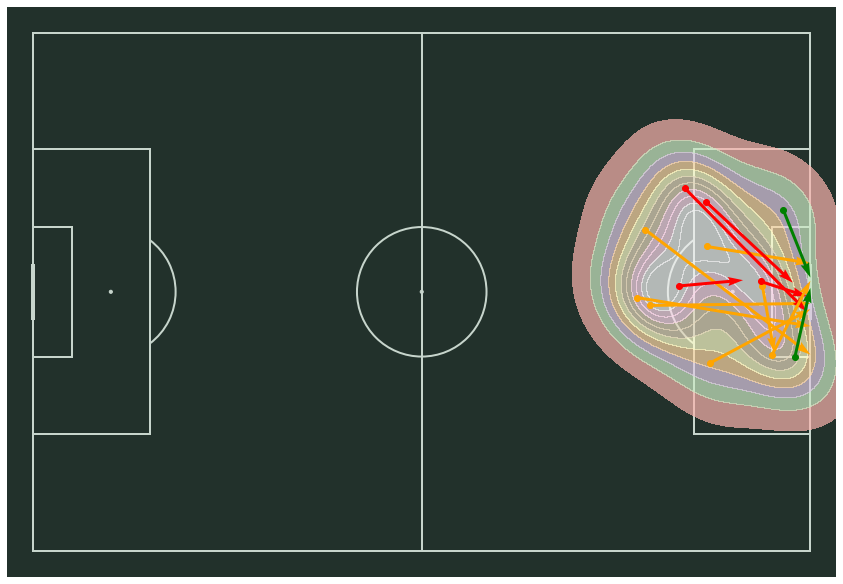

In [24]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13.5, 8),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()
#plt.gca().invert_yaxis()

kde = sns.kdeplot(
    shots_Loc_Real['x'],
    shots_Loc_Real['y'],
    shade=True,
    thresh=0.05,
    alpha = 0.7,
    n_levels=12,
    cmap = 'Pastel1'
)

for i in range(len(shots_Real)):
    if shots_Real.shot_outcome[i]=='Goal':
        pitch.arrows(shots_Real.location[i][0], shots_Real.location[i][1], shots_Real.shot_end_location[i][0], shots_Real.shot_end_location[i][1], ax=ax, color='green', width=3)
        pitch.scatter(shots_Real.location[i][0], shots_Real.location[i][1], ax = ax, color='green', alpha=1)
    elif shots_Real.shot_outcome[i] in ['Blocked', 'Saved']:
        pitch.arrows(shots_Real.location[i][0], shots_Real.location[i][1], shots_Real.shot_end_location[i][0], shots_Real.shot_end_location[i][1], ax=ax, color='red', width=3)
        pitch.scatter(shots_Real.location[i][0], shots_Real.location[i][1], ax = ax, color='red', alpha=1)
    else:
        pitch.arrows(shots_Real.location[i][0], shots_Real.location[i][1], shots_Real.shot_end_location[i][0], shots_Real.shot_end_location[i][1], ax=ax, color='orange', width=3)
        pitch.scatter(shots_Real.location[i][0], shots_Real.location[i][1], ax = ax, color='orange', alpha=1)

C:\Users\indra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


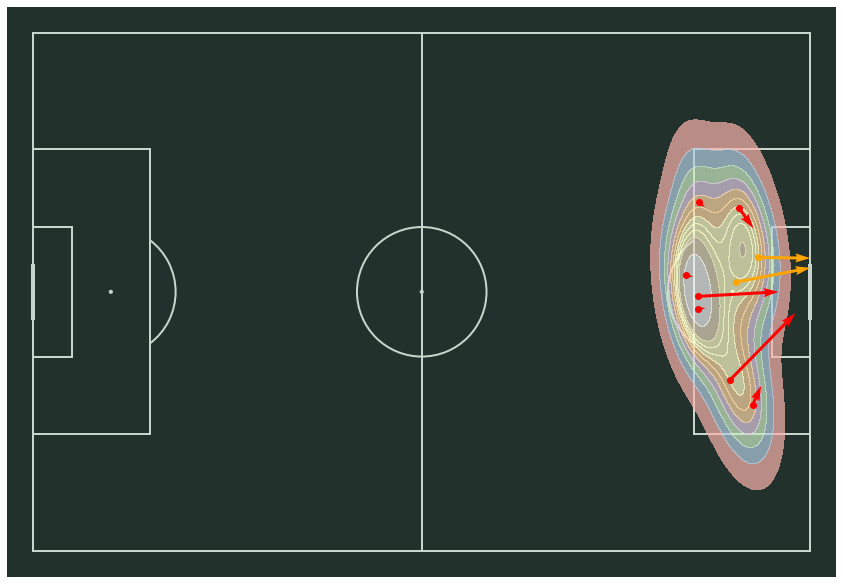

In [25]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13.5, 8),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()
#plt.gca().invert_yaxis()

kde = sns.kdeplot(
    shots_Loc_Barca['x'],
    shots_Loc_Barca['y'],
    shade=True,
    thresh=0.05,
    alpha = 0.7,
    n_levels=12,
    cmap = 'Pastel1'
)

for i in range(len(shots_Barca)):
    if shots_Barca.shot_outcome[i]=='Goal':
        pitch.arrows(shots_Barca.location[i][0], shots_Barca.location[i][1], shots_Barca.shot_end_location[i][0], shots_Barca.shot_end_location[i][1], ax=ax, color='green', width=3)
        pitch.scatter(shots_Barca.location[i][0], shots_Barca.location[i][1], ax = ax, color='green', alpha=1)
    elif shots_Barca.shot_outcome[i] in ['Blocked', 'Saved']:
        pitch.arrows(shots_Barca.location[i][0], shots_Barca.location[i][1], shots_Barca.shot_end_location[i][0], shots_Barca.shot_end_location[i][1], ax=ax, color='red', width=3)
        pitch.scatter(shots_Barca.location[i][0], shots_Barca.location[i][1], ax = ax, color='red', alpha=1)
    else:
        pitch.arrows(shots_Barca.location[i][0], shots_Barca.location[i][1], shots_Barca.shot_end_location[i][0], shots_Barca.shot_end_location[i][1], ax=ax, color='orange', width=3)
        pitch.scatter(shots_Barca.location[i][0], shots_Barca.location[i][1], ax = ax, color='orange', alpha=1)

### Pass Network Analysis

In [26]:
events.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection',
       'block_save_block', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_no_touch',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_success_in_play', 'goalkeeper_technique', 'goalkeeper_type',
       'id', 'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'p

In [27]:
events_3 = events[['minute', 'second', 'team', 'location', 'period', 'type', 'pass_outcome', 'player', 'position', 'pass_end_location']]

In [28]:
events_3

,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location
0,0,0,Real Madrid,NaN,1,Starting XI,NaN,NaN,NaN,NaN
1,0,0,Barcelona,NaN,1,Starting XI,NaN,NaN,NaN,NaN
2,0,0,Barcelona,NaN,1,Half Start,NaN,NaN,NaN,NaN
3,0,0,Real Madrid,NaN,1,Half Start,NaN,NaN,NaN,NaN
4,45,0,Barcelona,NaN,2,Half Start,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4222,79,56,Barcelona,NaN,2,Substitution,NaN,Arthur Henrique Ramos de Oliveira Melo,Right Center Midfield,NaN
4223,80,4,Barcelona,NaN,2,Substitution,NaN,Antoine Griezmann,Left Wing,NaN
4224,85,31,Real Madrid,NaN,2,Substitution,NaN,Federico Santiago Valverde Dipetta,Right Midfield,NaN
4225,90,54,Real Madrid,NaN,2,Substitution,NaN,Karim Benzema,Center Forward,NaN


In [29]:
events_3.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Block', 'Clearance', 'Ball Recovery', 'Interception',
       'Dribbled Past', 'Dribble', 'Miscontrol', 'Foul Committed', 'Duel',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Foul Won', 'Bad Behaviour',
       'Injury Stoppage', 'Half End', 'Substitution', 'Tactical Shift'],
      dtype=object)

In [30]:
events_3.pass_outcome.unique()

array([nan, 'Incomplete', 'Out', 'Injury Clearance', 'Unknown',
       'Pass Offside'], dtype=object)

In [31]:
events_3.player.unique()

array([nan, 'Karim Benzema', 'Francisco Román Alarcón Suárez',
       'Carlos Henrique Casimiro', 'Toni Kroos', 'Sergio Ramos García',
       'Marcelo Vieira da Silva Júnior', 'Raphaël Varane',
       'Daniel Carvajal Ramos', 'Vinícius José Paixão de Oliveira Júnior',
       'Lionel Andrés Messi Cuccittini', 'Frenkie de Jong',
       'Arthur Henrique Ramos de Oliveira Melo', 'Gerard Piqué Bernabéu',
       'Arturo Erasmo Vidal Pardo', 'Sergio Busquets i Burgos',
       'Nélson Cabral Semedo', 'Antoine Griezmann', 'Samuel Yves Umtiti',
       'Jordi Alba Ramos', 'Federico Santiago Valverde Dipetta',
       'Marc-André ter Stegen', 'Thibaut Courtois',
       'Martin Braithwaite Christensen', 'Luka Modrić', 'Ivan Rakitić',
       'Lucas Vázquez Iglesias', 'Anssumane Fati', 'Mariano Díaz Mejía'],
      dtype=object)

In [32]:
# filter for Real Madrid
events_Real=events_3[events_3['team']=='Real Madrid']
events_Real

,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location
0,0,0,Real Madrid,NaN,1,Starting XI,NaN,NaN,NaN,NaN
3,0,0,Real Madrid,NaN,1,Half Start,NaN,NaN,NaN,NaN
5,45,0,Real Madrid,NaN,2,Half Start,NaN,NaN,NaN,NaN
6,0,0,Real Madrid,"[60.0, 40.0]",1,Pass,NaN,Karim Benzema,Center Forward,"[53.2, 43.5]"
7,0,2,Real Madrid,"[53.3, 43.5]",1,Pass,NaN,Francisco Román Alarcón Suárez,Right Center Midfield,"[47.1, 36.9]"
...,...,...,...,...,...,...,...,...,...,...
4216,45,9,Real Madrid,NaN,1,Half End,NaN,NaN,NaN,NaN
4218,93,0,Real Madrid,NaN,2,Half End,NaN,NaN,NaN,NaN
4221,78,23,Real Madrid,NaN,2,Substitution,NaN,Francisco Román Alarcón Suárez,Right Center Midfield,NaN
4224,85,31,Real Madrid,NaN,2,Substitution,NaN,Federico Santiago Valverde Dipetta,Right Midfield,NaN


In [33]:
# Add the passer and the recipient columns
events_Real['passer'] = events_Real['player']
events_Real['recipient'] = events_Real['player'].shift(-1)

<ipython-input-33-a0baf043926b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_Real['passer'] = events_Real['player']
<ipython-input-33-a0baf043926b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_Real['recipient'] = events_Real['player'].shift(-1)


In [34]:
events_Real

,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location,passer,recipient
0,0,0,Real Madrid,NaN,1,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,Real Madrid,NaN,1,Half Start,NaN,NaN,NaN,NaN,NaN,NaN
5,45,0,Real Madrid,NaN,2,Half Start,NaN,NaN,NaN,NaN,NaN,Karim Benzema
6,0,0,Real Madrid,"[60.0, 40.0]",1,Pass,NaN,Karim Benzema,Center Forward,"[53.2, 43.5]",Karim Benzema,Francisco Román Alarcón Suárez
7,0,2,Real Madrid,"[53.3, 43.5]",1,Pass,NaN,Francisco Román Alarcón Suárez,Right Center Midfield,"[47.1, 36.9]",Francisco Román Alarcón Suárez,Carlos Henrique Casimiro
...,...,...,...,...,...,...,...,...,...,...,...,...
4216,45,9,Real Madrid,NaN,1,Half End,NaN,NaN,NaN,NaN,NaN,NaN
4218,93,0,Real Madrid,NaN,2,Half End,NaN,NaN,NaN,NaN,NaN,Francisco Román Alarcón Suárez
4221,78,23,Real Madrid,NaN,2,Substitution,NaN,Francisco Román Alarcón Suárez,Right Center Midfield,NaN,Francisco Román Alarcón Suárez,Federico Santiago Valverde Dipetta
4224,85,31,Real Madrid,NaN,2,Substitution,NaN,Federico Santiago Valverde Dipetta,Right Midfield,NaN,Federico Santiago Valverde Dipetta,Karim Benzema


In [35]:
#data frame with 'Pass' type
passes_Real = events_Real[events_Real['type'] == 'Pass']
passes_Real

,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location,passer,recipient
6,0,0,Real Madrid,"[60.0, 40.0]",1,Pass,NaN,Karim Benzema,Center Forward,"[53.2, 43.5]",Karim Benzema,Francisco Román Alarcón Suárez
7,0,2,Real Madrid,"[53.3, 43.5]",1,Pass,NaN,Francisco Román Alarcón Suárez,Right Center Midfield,"[47.1, 36.9]",Francisco Román Alarcón Suárez,Carlos Henrique Casimiro
8,0,3,Real Madrid,"[47.1, 36.9]",1,Pass,NaN,Carlos Henrique Casimiro,Center Defensive Midfield,"[47.1, 31.0]",Carlos Henrique Casimiro,Toni Kroos
9,0,4,Real Madrid,"[47.1, 31.0]",1,Pass,NaN,Toni Kroos,Left Center Midfield,"[47.4, 37.1]",Toni Kroos,Carlos Henrique Casimiro
10,0,5,Real Madrid,"[47.3, 36.9]",1,Pass,NaN,Carlos Henrique Casimiro,Center Defensive Midfield,"[46.6, 29.8]",Carlos Henrique Casimiro,Toni Kroos
...,...,...,...,...,...,...,...,...,...,...,...,...
1203,87,38,Real Madrid,"[110.6, 23.8]",2,Pass,NaN,Karim Benzema,Center Forward,"[98.4, 33.2]",Karim Benzema,Thibaut Courtois
1216,90,29,Real Madrid,"[16.5, 34.8]",2,Pass,Incomplete,Thibaut Courtois,Goalkeeper,"[57.2, 12.5]",Thibaut Courtois,Marcelo Vieira da Silva Júnior
1218,91,3,Real Madrid,"[56.8, 0.1]",2,Pass,Incomplete,Marcelo Vieira da Silva Júnior,Left Back,"[79.8, 6.4]",Marcelo Vieira da Silva Júnior,Carlos Henrique Casimiro
1221,91,8,Real Madrid,"[56.9, 26.1]",2,Pass,Incomplete,Carlos Henrique Casimiro,Center Defensive Midfield,"[76.8, 61.9]",Carlos Henrique Casimiro,Daniel Carvajal Ramos


In [36]:
# Successful passes
successful_Real = passes_Real[passes_Real['pass_outcome'].isnull()]
successful_Real

,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location,passer,recipient
6,0,0,Real Madrid,"[60.0, 40.0]",1,Pass,NaN,Karim Benzema,Center Forward,"[53.2, 43.5]",Karim Benzema,Francisco Román Alarcón Suárez
7,0,2,Real Madrid,"[53.3, 43.5]",1,Pass,NaN,Francisco Román Alarcón Suárez,Right Center Midfield,"[47.1, 36.9]",Francisco Román Alarcón Suárez,Carlos Henrique Casimiro
8,0,3,Real Madrid,"[47.1, 36.9]",1,Pass,NaN,Carlos Henrique Casimiro,Center Defensive Midfield,"[47.1, 31.0]",Carlos Henrique Casimiro,Toni Kroos
9,0,4,Real Madrid,"[47.1, 31.0]",1,Pass,NaN,Toni Kroos,Left Center Midfield,"[47.4, 37.1]",Toni Kroos,Carlos Henrique Casimiro
10,0,5,Real Madrid,"[47.3, 36.9]",1,Pass,NaN,Carlos Henrique Casimiro,Center Defensive Midfield,"[46.6, 29.8]",Carlos Henrique Casimiro,Toni Kroos
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,87,23,Real Madrid,"[37.1, 68.9]",2,Pass,NaN,Daniel Carvajal Ramos,Right Back,"[15.9, 61.5]",Daniel Carvajal Ramos,Raphaël Varane
1201,87,25,Real Madrid,"[15.9, 61.5]",2,Pass,NaN,Raphaël Varane,Right Center Back,"[49.1, 6.6]",Raphaël Varane,Marcelo Vieira da Silva Júnior
1202,87,34,Real Madrid,"[97.3, 29.8]",2,Pass,NaN,Marcelo Vieira da Silva Júnior,Left Back,"[110.1, 21.2]",Marcelo Vieira da Silva Júnior,Karim Benzema
1203,87,38,Real Madrid,"[110.6, 23.8]",2,Pass,NaN,Karim Benzema,Center Forward,"[98.4, 33.2]",Karim Benzema,Thibaut Courtois


In [37]:
# Check whether no NaNs are present
sum(successful_Real.recipient.isnull()+1)

465

In [38]:
# Pass network before the first substitution takes place
subs_Real = events_Real[events_Real['type']=='Substitution']
subs_Real

,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location,passer,recipient
4221,78,23,Real Madrid,NaN,2,Substitution,NaN,Francisco Román Alarcón Suárez,Right Center Midfield,NaN,Francisco Román Alarcón Suárez,Federico Santiago Valverde Dipetta
4224,85,31,Real Madrid,NaN,2,Substitution,NaN,Federico Santiago Valverde Dipetta,Right Midfield,NaN,Federico Santiago Valverde Dipetta,Karim Benzema
4225,90,54,Real Madrid,NaN,2,Substitution,NaN,Karim Benzema,Center Forward,NaN,Karim Benzema,NaN


In [39]:
# Time when the first substituion took place
first_sub_Real_minute = subs_Real['minute'].min()
first_sub_Real_minute_df = subs_Real[subs_Real['minute'] == first_sub_Real_minute]
first_sub_Real_second = first_sub_Real_minute_df['second'].min()
first_sub_Real_minute, first_sub_Real_second

(78, 23)

In [40]:
# Filter oute the data for generating pass network before the first substitution takes place
successful_Real = successful_Real[(successful_Real['minute']<=first_sub_Real_minute) & (successful_Real['second']<first_sub_Real_second)]
successful_Real

,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location,passer,recipient
6,0,0,Real Madrid,"[60.0, 40.0]",1,Pass,NaN,Karim Benzema,Center Forward,"[53.2, 43.5]",Karim Benzema,Francisco Román Alarcón Suárez
7,0,2,Real Madrid,"[53.3, 43.5]",1,Pass,NaN,Francisco Román Alarcón Suárez,Right Center Midfield,"[47.1, 36.9]",Francisco Román Alarcón Suárez,Carlos Henrique Casimiro
8,0,3,Real Madrid,"[47.1, 36.9]",1,Pass,NaN,Carlos Henrique Casimiro,Center Defensive Midfield,"[47.1, 31.0]",Carlos Henrique Casimiro,Toni Kroos
9,0,4,Real Madrid,"[47.1, 31.0]",1,Pass,NaN,Toni Kroos,Left Center Midfield,"[47.4, 37.1]",Toni Kroos,Carlos Henrique Casimiro
10,0,5,Real Madrid,"[47.3, 36.9]",1,Pass,NaN,Carlos Henrique Casimiro,Center Defensive Midfield,"[46.6, 29.8]",Carlos Henrique Casimiro,Toni Kroos
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,77,16,Real Madrid,"[70.6, 56.6]",2,Pass,NaN,Raphaël Varane,Right Center Back,"[63.6, 27.3]",Raphaël Varane,Sergio Ramos García
1096,77,18,Real Madrid,"[63.0, 27.4]",2,Pass,NaN,Sergio Ramos García,Left Center Back,"[72.4, 20.7]",Sergio Ramos García,Francisco Román Alarcón Suárez
1097,77,19,Real Madrid,"[72.4, 20.7]",2,Pass,NaN,Francisco Román Alarcón Suárez,Right Center Midfield,"[63.6, 25.8]",Francisco Román Alarcón Suárez,Sergio Ramos García
1098,77,21,Real Madrid,"[62.4, 26.6]",2,Pass,NaN,Sergio Ramos García,Left Center Back,"[64.6, 25.3]",Sergio Ramos García,Francisco Román Alarcón Suárez


In [41]:
pass_loc_Real = successful_Real['location']
pass_loc_Real = pd.DataFrame(pass_loc_Real.to_list(), columns=['x', 'y'])
pass_end_loc_Real = successful_Real['pass_end_location']
pass_end_loc_Real = pd.DataFrame(pass_end_loc_Real.to_list(), columns=['end_x', 'end_y'])
pass_end_loc_Real

,end_x,end_y
0,53.2,43.5
1,47.1,36.9
2,47.1,31.0
3,47.4,37.1
4,46.6,29.8
...,...,...
161,63.6,27.3
162,72.4,20.7
163,63.6,25.8
164,64.6,25.3


In [42]:
successful_Real=successful_Real.reset_index()
successful_Real['x'] = pass_loc_Real['x']
successful_Real['y'] = pass_loc_Real['y']
successful_Real['end_x'] = pass_end_loc_Real['end_x']
successful_Real['end_y'] = pass_end_loc_Real['end_y']
successful_Real

,index,minute,second,team,location,period,type,pass_outcome,player,position,pass_end_location,passer,recipient,x,y,end_x,end_y
0,6,0,0,Real Madrid,"[60.0, 40.0]",1,Pass,NaN,Karim Benzema,Center Forward,"[53.2, 43.5]",Karim Benzema,Francisco Román Alarcón Suárez,60.0,40.0,53.2,43.5
1,7,0,2,Real Madrid,"[53.3, 43.5]",1,Pass,NaN,Francisco Román Alarcón Suárez,Right Center Midfield,"[47.1, 36.9]",Francisco Román Alarcón Suárez,Carlos Henrique Casimiro,53.3,43.5,47.1,36.9
2,8,0,3,Real Madrid,"[47.1, 36.9]",1,Pass,NaN,Carlos Henrique Casimiro,Center Defensive Midfield,"[47.1, 31.0]",Carlos Henrique Casimiro,Toni Kroos,47.1,36.9,47.1,31.0
3,9,0,4,Real Madrid,"[47.1, 31.0]",1,Pass,NaN,Toni Kroos,Left Center Midfield,"[47.4, 37.1]",Toni Kroos,Carlos Henrique Casimiro,47.1,31.0,47.4,37.1
4,10,0,5,Real Madrid,"[47.3, 36.9]",1,Pass,NaN,Carlos Henrique Casimiro,Center Defensive Midfield,"[46.6, 29.8]",Carlos Henrique Casimiro,Toni Kroos,47.3,36.9,46.6,29.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,1095,77,16,Real Madrid,"[70.6, 56.6]",2,Pass,NaN,Raphaël Varane,Right Center Back,"[63.6, 27.3]",Raphaël Varane,Sergio Ramos García,70.6,56.6,63.6,27.3
162,1096,77,18,Real Madrid,"[63.0, 27.4]",2,Pass,NaN,Sergio Ramos García,Left Center Back,"[72.4, 20.7]",Sergio Ramos García,Francisco Román Alarcón Suárez,63.0,27.4,72.4,20.7
163,1097,77,19,Real Madrid,"[72.4, 20.7]",2,Pass,NaN,Francisco Román Alarcón Suárez,Right Center Midfield,"[63.6, 25.8]",Francisco Román Alarcón Suárez,Sergio Ramos García,72.4,20.7,63.6,25.8
164,1098,77,21,Real Madrid,"[62.4, 26.6]",2,Pass,NaN,Sergio Ramos García,Left Center Back,"[64.6, 25.3]",Sergio Ramos García,Francisco Román Alarcón Suárez,62.4,26.6,64.6,25.3


In [43]:
del successful_Real['location']
del successful_Real['pass_end_location']
successful_Real

,index,minute,second,team,period,type,pass_outcome,player,position,passer,recipient,x,y,end_x,end_y
0,6,0,0,Real Madrid,1,Pass,NaN,Karim Benzema,Center Forward,Karim Benzema,Francisco Román Alarcón Suárez,60.0,40.0,53.2,43.5
1,7,0,2,Real Madrid,1,Pass,NaN,Francisco Román Alarcón Suárez,Right Center Midfield,Francisco Román Alarcón Suárez,Carlos Henrique Casimiro,53.3,43.5,47.1,36.9
2,8,0,3,Real Madrid,1,Pass,NaN,Carlos Henrique Casimiro,Center Defensive Midfield,Carlos Henrique Casimiro,Toni Kroos,47.1,36.9,47.1,31.0
3,9,0,4,Real Madrid,1,Pass,NaN,Toni Kroos,Left Center Midfield,Toni Kroos,Carlos Henrique Casimiro,47.1,31.0,47.4,37.1
4,10,0,5,Real Madrid,1,Pass,NaN,Carlos Henrique Casimiro,Center Defensive Midfield,Carlos Henrique Casimiro,Toni Kroos,47.3,36.9,46.6,29.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,1095,77,16,Real Madrid,2,Pass,NaN,Raphaël Varane,Right Center Back,Raphaël Varane,Sergio Ramos García,70.6,56.6,63.6,27.3
162,1096,77,18,Real Madrid,2,Pass,NaN,Sergio Ramos García,Left Center Back,Sergio Ramos García,Francisco Román Alarcón Suárez,63.0,27.4,72.4,20.7
163,1097,77,19,Real Madrid,2,Pass,NaN,Francisco Román Alarcón Suárez,Right Center Midfield,Francisco Román Alarcón Suárez,Sergio Ramos García,72.4,20.7,63.6,25.8
164,1098,77,21,Real Madrid,2,Pass,NaN,Sergio Ramos García,Left Center Back,Sergio Ramos García,Francisco Román Alarcón Suárez,62.4,26.6,64.6,25.3


In [44]:
successful_Real['pass_outcome'] = 'successful'
successful_Real

,index,minute,second,team,period,type,pass_outcome,player,position,passer,recipient,x,y,end_x,end_y
0,6,0,0,Real Madrid,1,Pass,successful,Karim Benzema,Center Forward,Karim Benzema,Francisco Román Alarcón Suárez,60.0,40.0,53.2,43.5
1,7,0,2,Real Madrid,1,Pass,successful,Francisco Román Alarcón Suárez,Right Center Midfield,Francisco Román Alarcón Suárez,Carlos Henrique Casimiro,53.3,43.5,47.1,36.9
2,8,0,3,Real Madrid,1,Pass,successful,Carlos Henrique Casimiro,Center Defensive Midfield,Carlos Henrique Casimiro,Toni Kroos,47.1,36.9,47.1,31.0
3,9,0,4,Real Madrid,1,Pass,successful,Toni Kroos,Left Center Midfield,Toni Kroos,Carlos Henrique Casimiro,47.1,31.0,47.4,37.1
4,10,0,5,Real Madrid,1,Pass,successful,Carlos Henrique Casimiro,Center Defensive Midfield,Carlos Henrique Casimiro,Toni Kroos,47.3,36.9,46.6,29.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,1095,77,16,Real Madrid,2,Pass,successful,Raphaël Varane,Right Center Back,Raphaël Varane,Sergio Ramos García,70.6,56.6,63.6,27.3
162,1096,77,18,Real Madrid,2,Pass,successful,Sergio Ramos García,Left Center Back,Sergio Ramos García,Francisco Román Alarcón Suárez,63.0,27.4,72.4,20.7
163,1097,77,19,Real Madrid,2,Pass,successful,Francisco Román Alarcón Suárez,Right Center Midfield,Francisco Román Alarcón Suárez,Sergio Ramos García,72.4,20.7,63.6,25.8
164,1098,77,21,Real Madrid,2,Pass,successful,Sergio Ramos García,Left Center Back,Sergio Ramos García,Francisco Román Alarcón Suárez,62.4,26.6,64.6,25.3


In [45]:
# find the average locations of the passer
avg_loc_Real = successful_Real.groupby('passer').agg({'x':['mean'], 'y': ['mean', 'count']})
avg_loc_Real

x          y      
                                              mean       mean count
passer                                                             
Carlos Henrique Casimiro                 52.128571  43.271429    21
Daniel Carvajal Ramos                    65.360000  64.675000    20
Federico Santiago Valverde Dipetta       76.900000  65.552941    17
Francisco Román Alarcón Suárez           67.389474  27.873684    19
Karim Benzema                            77.988235  49.552941    17
Marcelo Vieira da Silva Júnior           67.333333   6.419048    21
Raphaël Varane                           43.140000  55.780000     5
Sergio Ramos García                      37.800000  21.127273    11
Thibaut Courtois                          6.616667  42.050000     6
Toni Kroos                               61.890000  22.315000    20
Vinícius José Paixão de Oliveira Júnior  91.677778  16.311111     9

In [46]:
avg_loc_Real.columns=['x', 'y', 'count']
avg_loc_Real

,x,y,count
passer,,,
Carlos Henrique Casimiro,52.128571,43.271429,21
Daniel Carvajal Ramos,65.360000,64.675000,20
Federico Santiago Valverde Dipetta,76.900000,65.552941,17
Francisco Román Alarcón Suárez,67.389474,27.873684,19
Karim Benzema,77.988235,49.552941,17
Marcelo Vieira da Silva Júnior,67.333333,6.419048,21
Raphaël Varane,43.140000,55.780000,5
Sergio Ramos García,37.800000,21.127273,11
Thibaut Courtois,6.616667,42.050000,6


In [47]:
Casimiro = successful_Real[successful_Real['player'] == 'Carlos Henrique Casimiro']
len(Casimiro)

21

In [48]:
# Number of passes between each player
pass_bet_Real = successful_Real.groupby(['passer', 'recipient']).index.count().reset_index()
pass_bet_Real

,passer,recipient,index
0,Carlos Henrique Casimiro,Daniel Carvajal Ramos,2
1,Carlos Henrique Casimiro,Federico Santiago Valverde Dipetta,2
2,Carlos Henrique Casimiro,Francisco Román Alarcón Suárez,1
3,Carlos Henrique Casimiro,Karim Benzema,3
4,Carlos Henrique Casimiro,Marcelo Vieira da Silva Júnior,2
...,...,...,...
64,Toni Kroos,Vinícius José Paixão de Oliveira Júnior,1
65,Vinícius José Paixão de Oliveira Júnior,Francisco Román Alarcón Suárez,1
66,Vinícius José Paixão de Oliveira Júnior,Karim Benzema,2
67,Vinícius José Paixão de Oliveira Júnior,Marcelo Vieira da Silva Júnior,5


In [49]:
pass_bet_Real.rename({'index':'pass_count'}, axis='columns', inplace=True)
pass_bet_Real

,passer,recipient,pass_count
0,Carlos Henrique Casimiro,Daniel Carvajal Ramos,2
1,Carlos Henrique Casimiro,Federico Santiago Valverde Dipetta,2
2,Carlos Henrique Casimiro,Francisco Román Alarcón Suárez,1
3,Carlos Henrique Casimiro,Karim Benzema,3
4,Carlos Henrique Casimiro,Marcelo Vieira da Silva Júnior,2
...,...,...,...
64,Toni Kroos,Vinícius José Paixão de Oliveira Júnior,1
65,Vinícius José Paixão de Oliveira Júnior,Francisco Román Alarcón Suárez,1
66,Vinícius José Paixão de Oliveira Júnior,Karim Benzema,2
67,Vinícius José Paixão de Oliveira Júnior,Marcelo Vieira da Silva Júnior,5


In [50]:
pass_bet_Real = pass_bet_Real.merge(avg_loc_Real, left_on = 'passer', right_index=True)
pass_bet_Real

,passer,recipient,pass_count,x,y,count
0,Carlos Henrique Casimiro,Daniel Carvajal Ramos,2,52.128571,43.271429,21
1,Carlos Henrique Casimiro,Federico Santiago Valverde Dipetta,2,52.128571,43.271429,21
2,Carlos Henrique Casimiro,Francisco Román Alarcón Suárez,1,52.128571,43.271429,21
3,Carlos Henrique Casimiro,Karim Benzema,3,52.128571,43.271429,21
4,Carlos Henrique Casimiro,Marcelo Vieira da Silva Júnior,2,52.128571,43.271429,21
...,...,...,...,...,...,...
64,Toni Kroos,Vinícius José Paixão de Oliveira Júnior,1,61.890000,22.315000,20
65,Vinícius José Paixão de Oliveira Júnior,Francisco Román Alarcón Suárez,1,91.677778,16.311111,9
66,Vinícius José Paixão de Oliveira Júnior,Karim Benzema,2,91.677778,16.311111,9
67,Vinícius José Paixão de Oliveira Júnior,Marcelo Vieira da Silva Júnior,5,91.677778,16.311111,9


In [51]:
pass_bet_Real = pass_bet_Real.merge(avg_loc_Real, left_on = 'recipient', right_index=True, suffixes=['', '_end'])
pass_bet_Real

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,Carlos Henrique Casimiro,Daniel Carvajal Ramos,2,52.128571,43.271429,21,65.360000,64.675000,20
16,Federico Santiago Valverde Dipetta,Daniel Carvajal Ramos,8,76.900000,65.552941,17,65.360000,64.675000,20
29,Karim Benzema,Daniel Carvajal Ramos,4,77.988235,49.552941,17,65.360000,64.675000,20
35,Marcelo Vieira da Silva Júnior,Daniel Carvajal Ramos,2,67.333333,6.419048,21,65.360000,64.675000,20
42,Raphaël Varane,Daniel Carvajal Ramos,2,43.140000,55.780000,5,65.360000,64.675000,20
...,...,...,...,...,...,...,...,...,...
34,Karim Benzema,Vinícius José Paixão de Oliveira Júnior,2,77.988235,49.552941,17,91.677778,16.311111,9
41,Marcelo Vieira da Silva Júnior,Vinícius José Paixão de Oliveira Júnior,4,67.333333,6.419048,21,91.677778,16.311111,9
64,Toni Kroos,Vinícius José Paixão de Oliveira Júnior,1,61.890000,22.315000,20,91.677778,16.311111,9
32,Karim Benzema,Thibaut Courtois,1,77.988235,49.552941,17,6.616667,42.050000,6


Text(0.5, 1.0, 'Pass Network of Real Madrid (Home) against Barcelona (Away) on 2019-20 season (RMA 2-0 FCB)')

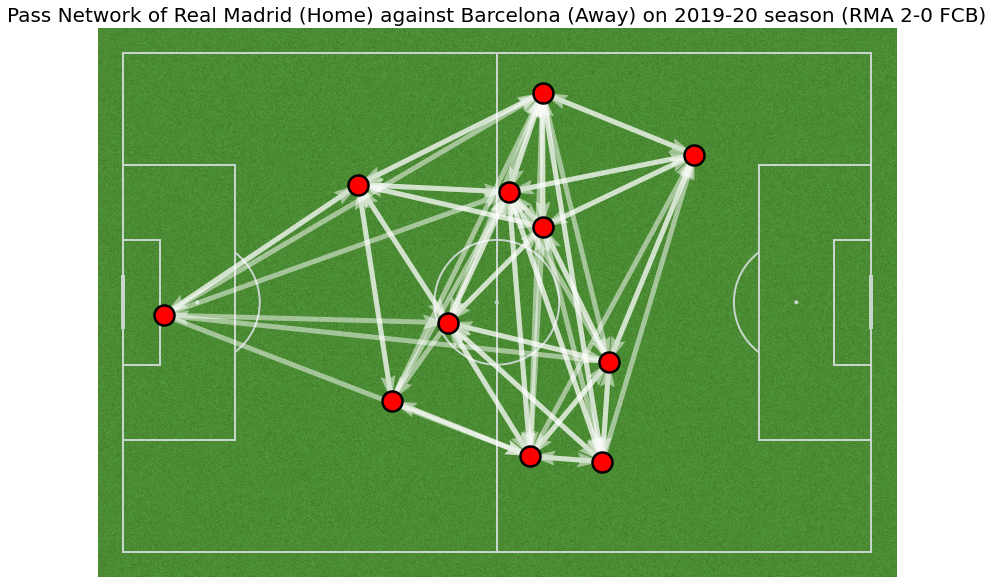

In [52]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='grass', line_color='#c7d5cc', figsize=(13.5, 8),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()

arrows = pitch.arrows(pass_bet_Real.x, pass_bet_Real.y, pass_bet_Real.x_end, pass_bet_Real.y_end, ax=ax, width=5,
                     headwidth=3, color='white', zorder=1, alpha=0.5)
nodes = pitch.scatter(avg_loc_Real.x, avg_loc_Real.y, s=400, color='red', edgecolors='black', linewidth=2.5, alpha=1, zorder=1, ax=ax)

ax.set_title('Pass Network of Real Madrid (Home) against Barcelona (Away) on 2019-20 season (RMA 2-0 FCB)', size=20)

In [53]:
graph_Real = pass_bet_Real[['passer', 'recipient', 'pass_count']]
graph_Real

,passer,recipient,pass_count
0,Carlos Henrique Casimiro,Daniel Carvajal Ramos,2
16,Federico Santiago Valverde Dipetta,Daniel Carvajal Ramos,8
29,Karim Benzema,Daniel Carvajal Ramos,4
35,Marcelo Vieira da Silva Júnior,Daniel Carvajal Ramos,2
42,Raphaël Varane,Daniel Carvajal Ramos,2
...,...,...,...
34,Karim Benzema,Vinícius José Paixão de Oliveira Júnior,2
41,Marcelo Vieira da Silva Júnior,Vinícius José Paixão de Oliveira Júnior,4
64,Toni Kroos,Vinícius José Paixão de Oliveira Júnior,1
32,Karim Benzema,Thibaut Courtois,1


In [54]:
graph_Real.passer.unique()

array(['Carlos Henrique Casimiro', 'Federico Santiago Valverde Dipetta',
       'Karim Benzema', 'Marcelo Vieira da Silva Júnior',
       'Raphaël Varane', 'Thibaut Courtois', 'Toni Kroos',
       'Daniel Carvajal Ramos', 'Francisco Román Alarcón Suárez',
       'Sergio Ramos García', 'Vinícius José Paixão de Oliveira Júnior'],
      dtype=object)

In [55]:
player_number_dict = {'Carlos Henrique Casimiro': 14, 'Federico Santiago Valverde Dipetta': 15, 'Karim Benzema': 9, 'Marcelo Vieira da Silva Júnior': 12,
                 'Raphaël Varane': 5, 'Thibaut Courtois': 13, 'Toni Kroos': 8, 'Daniel Carvajal Ramos': 2, 'Francisco Román Alarcón Suárez': 22,
                 'Sergio Ramos García': 4, 'Vinícius José Paixão de Oliveira Júnior': 25}
graph_Real['passer'] = graph_Real.passer.map(player_number_dict)
graph_Real['recipient'] = graph_Real.recipient.map(player_number_dict)

<ipython-input-55-8ea438011f53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_Real['passer'] = graph_Real.passer.map(player_number_dict)
<ipython-input-55-8ea438011f53>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_Real['recipient'] = graph_Real.recipient.map(player_number_dict)


In [56]:
graph_Real

,passer,recipient,pass_count
0,14,2,2
16,15,2,8
29,9,2,4
35,12,2,2
42,5,2,2
...,...,...,...
34,9,25,2
41,12,25,4
64,8,25,1
32,9,13,1


In [57]:
# convert the dataframe to a list of tuples
L = graph_Real.apply(tuple, axis=1).tolist()

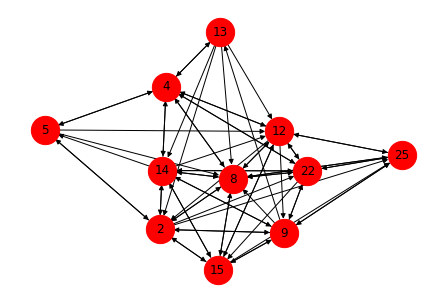

In [58]:
# Draw the NetworkX graph of the Pass network
G = nx.DiGraph()
G.add_weighted_edges_from(L)
nx.draw(G, node_size=800, with_labels=True, node_color='red')

In [59]:
# Vertex degrees
dict(nx.degree(G))

{14: 15,
 2: 14,
 15: 12,
 9: 13,
 12: 15,
 5: 7,
 13: 7,
 8: 17,
 22: 14,
 4: 14,
 25: 10}

Text(0.5, 1.0, 'Successful passes (degrees) of each player (vertex)')

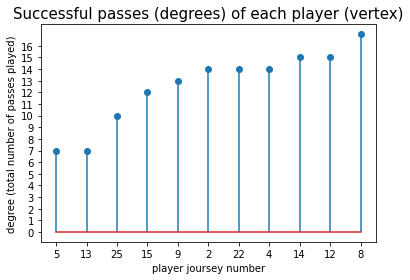

In [60]:
dic = dict(nx.degree(G))
player = dic.keys()
degrees = dic.values()
degree_Real = pd.DataFrame({'player':player, 'degrees':degrees})

ordered = degree_Real.sort_values(by = 'degrees')
x_range = range(len(degree_Real.index))
y_range = range(math.ceil(max(degree_Real.degrees)))


plt.stem(ordered['degrees'])
plt.xticks(x_range, ordered['player'])
plt.yticks(y_range)
plt.xlabel("player jersey number")
plt.ylabel("degree (total number of passes played)")
plt.title("Successful passes (degrees) of each player (vertex)", size=15)

Text(0.5, 1.0, 'Successful passes received (indegrees) for each player (vertex)')

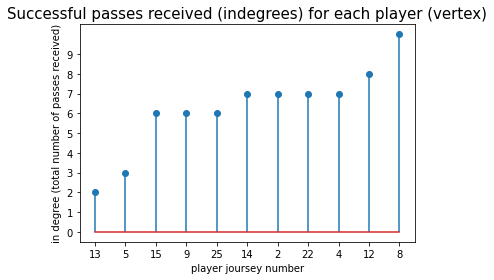

In [61]:
dic = dict(G.in_degree())
player = dic.keys()
in_degrees = dic.values()
in_degree_Real = pd.DataFrame({'player':player, 'in_degrees':in_degrees})

ordered = in_degree_Real.sort_values(by = 'in_degrees')
x_range = range(len(in_degree_Real.index))
y_range = range(math.ceil(max(in_degree_Real.in_degrees)))


plt.stem(ordered['in_degrees'])
plt.xticks(x_range, ordered['player'])
plt.yticks(y_range)
plt.xlabel("player jersey number")
plt.ylabel("in degree (total number of passes received)")
plt.title("Successful passes received (indegrees) for each player (vertex)", size=15)

Text(0.5, 1.0, 'Successful passes given (indegrees) by each player (vertex)')

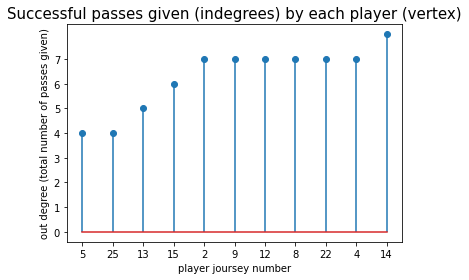

In [62]:
dic = dict(G.out_degree())
player = dic.keys()
out_degrees = dic.values()
out_degree_Real = pd.DataFrame({'player':player, 'out_degrees':out_degrees})

ordered = out_degree_Real.sort_values(by = 'out_degrees')
x_range = range(len(out_degree_Real.index))
y_range = range(math.ceil(max(out_degree_Real.out_degrees)))


plt.stem(ordered['out_degrees'])
plt.xticks(x_range, ordered['player'])
plt.yticks(y_range)
plt.xlabel("player jersey number")
plt.ylabel("out degree (total number of passes given)")
plt.title("Successful passes given (indegrees) by each player (vertex)", size=15)

In [63]:
# Adjacency matrix of the pass network
A = nx.adjacency_matrix(G)
A.todense()

matrix([[0, 2, 2, 3, 2, 2, 0, 6, 1, 3, 0],
        [8, 0, 4, 3, 0, 1, 0, 2, 1, 0, 1],
        [1, 8, 0, 4, 2, 0, 0, 1, 0, 0, 1],
        [1, 4, 3, 0, 0, 0, 1, 2, 4, 0, 2],
        [0, 2, 1, 3, 0, 0, 0, 4, 3, 4, 4],
        [0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0],
        [1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0],
        [5, 1, 3, 0, 5, 0, 0, 0, 4, 1, 1],
        [3, 0, 1, 1, 5, 0, 0, 5, 0, 1, 3],
        [2, 0, 0, 0, 1, 1, 1, 3, 2, 1, 0],
        [0, 0, 0, 2, 5, 0, 0, 1, 1, 0, 0]], dtype=int32)

In [64]:
# degree correlation coefficient of a graph
r_degree = nx.degree_pearson_correlation_coefficient(G)
r_degree

-0.242942496753048

### A positive value of the average degree correlation value ($r_{degree}$) shows an overall positive relationship between the degrees (number of successfull passes) of two adjacent vertices (players). Whereas a negative value shows an overall negative relationship. If it is 0, there's no relationship. Also $r_{degree} \in [-1, 1]$.

### Another simpler metric for studying vertex correlations is scale freeness of a graph, given by:

$$S(G) = \sum_{i=1}^n \sum_{j=1}^n(d_i.d_j.\mathbf{A}[i, j])$$
### where $d_i$ is the degree of the vertex $v_i$ and $\mathbf{A}$ is the adjacency matrix of the graph $G$. Scale-freeness is larger when graph hubs are attached to other hubs, forming a kind of cluster. This metric can be more improved using some kind of normalization.

In [65]:
n = np.shape(A)[0]
S = 0
dic = dict(nx.degree(G)).values()
D = list(dic)

for i in range(n):
    for j in range(i+1, n):        
        d_i = D[i]
        d_j = D[j]
        S += d_i*d_j*A[i, j]
print(S)

14852


### Some distance statistics metrics

#### Geodesic distance between two vertices (players) in the pass network

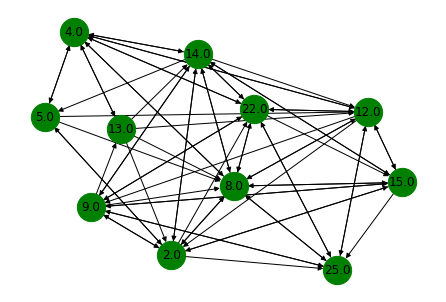

In [66]:
def inv(x): 
    return 1/x

GR = graph_Real[:]
GR['pass_count'] = GR['pass_count'].apply(inv)

LR = GR.apply(tuple, axis=1).tolist()

G_inw = nx.DiGraph()
G_inw.add_weighted_edges_from(LR)
nx.draw(G_inw, node_size=800, with_labels=True, node_color='green')

In [67]:
dis = nx.shortest_path(G_inw, weight='pass_count')
dis

{14.0: {14.0: [14.0],
  2.0: [14.0, 2.0],
  15.0: [14.0, 15.0],
  22.0: [14.0, 22.0],
  9.0: [14.0, 9.0],
  12.0: [14.0, 12.0],
  5.0: [14.0, 5.0],
  4.0: [14.0, 4.0],
  8.0: [14.0, 8.0],
  25.0: [14.0, 2.0, 25.0],
  13.0: [14.0, 9.0, 13.0]},
 2.0: {2.0: [2.0],
  15.0: [2.0, 15.0],
  22.0: [2.0, 22.0],
  9.0: [2.0, 9.0],
  5.0: [2.0, 5.0],
  8.0: [2.0, 8.0],
  14.0: [2.0, 14.0],
  25.0: [2.0, 25.0],
  12.0: [2.0, 15.0, 12.0],
  4.0: [2.0, 22.0, 4.0],
  13.0: [2.0, 9.0, 13.0]},
 15.0: {15.0: [15.0],
  2.0: [15.0, 2.0],
  9.0: [15.0, 9.0],
  12.0: [15.0, 12.0],
  8.0: [15.0, 8.0],
  14.0: [15.0, 14.0],
  25.0: [15.0, 25.0],
  22.0: [15.0, 2.0, 22.0],
  5.0: [15.0, 2.0, 5.0],
  13.0: [15.0, 9.0, 13.0],
  4.0: [15.0, 12.0, 4.0]},
 9.0: {9.0: [9.0],
  2.0: [9.0, 2.0],
  15.0: [9.0, 15.0],
  22.0: [9.0, 22.0],
  8.0: [9.0, 8.0],
  14.0: [9.0, 14.0],
  25.0: [9.0, 25.0],
  13.0: [9.0, 13.0],
  5.0: [9.0, 2.0, 5.0],
  12.0: [9.0, 15.0, 12.0],
  4.0: [9.0, 22.0, 4.0]},
 12.0: {12.0: [12.0],
  2

#### Suppose you want to find out the shortest path between Thibaut Courtois (jersey number 13) to Vinícius Júnior (jersey number 25) in the pass network. We see that the shortest path goes through Dani Carvajal (jersey number 2) in the pass network

In [68]:
dis[13][25]

[13.0, 2.0, 25.0]

#### Eccentricity of a vertex (player) v tells us how far the farthest vertex from v is positioned in the pass network

In [69]:
E = nx.eccentricity(G_inw)
E

{14.0: 2,
 2.0: 2,
 15.0: 2,
 9.0: 2,
 12.0: 2,
 5.0: 2,
 13.0: 2,
 8.0: 2,
 22.0: 2,
 4.0: 2,
 25.0: 3}

#### We can also calculate the average eccentricity

In [70]:
Av_eccentricity = sum(list(E.values()))/len(E)
Av_eccentricity

2.090909090909091

#### Clustering Coefficient of the graph G

In [71]:
cc = nx.average_clustering(G, weight='pass_count')
cc

0.6776619819002779

#### We can compare the average clustering coeffcient of Barcelona pass network for the same match with the average clustering coefficient of Real Madrid pass network.

#### Finally we can measure the centrality of each vertex (player) in a pass network and decide which player is the most important in the network


In [72]:
bc = nx.betweenness_centrality(G, weight='pass_count')
bc

{14: 0.06407407407407406,
 2: 0.06703703703703703,
 15: 0.011481481481481481,
 9: 0.07043209876543209,
 12: 0.06469135802469136,
 5: 0.006851851851851852,
 13: 0.006851851851851852,
 8: 0.06962962962962964,
 22: 0.037654320987654324,
 4: 0.07166666666666666,
 25: 0.007407407407407408}

In [73]:
max_bc = max(bc, key=bc.get)
max_bc

4

#### The jersey number 4 belongs to Sergio Ramos